<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/3_%ED%9B%88%EB%A0%A8_%EB%85%B8%ED%95%98%EC%9A%B0_%EC%9D%B5%ED%9E%88%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 훈련 노하우 배우기

"어느 데이터 세트에만 치우친 모델을 만들지 않는 것"

In [25]:
# 로지스틱 회귀로 모델 훈련하고 평가
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

In [26]:
# 서포트 벡터 머신으로 모델 훈련하고 평가하기
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

## 결과
로지스틱 회귀의 성능 평가 결과는 83%  
서포트 벡터 머신의 성능 평가 결과는 93%  

성능이 만족스럽지 않을 경우 loss 매개변수에 다른 값을 적용할 수 있음  
이런 작업을 `모델을 튜닝한다`고 함

## 문제점
### 테스트 세트로 모델을 튜닝하면 실전에서 좋은 성능을 못낼 수 있음  

테스트 세트는 실전에 투입된 모델의 성능을 측정하기 위해 사용되는데, 테스트 세트로 모델을 튜닝하면 `테스트 세트에 대해서만` 좋은 성능을 보여주는 모델이 만들어짐  

이는 학생에게 문제의 답안지만 달달 외우게 한 것과 비슷함  

즉, 답안지에 있는 문제는 잘 푸는데 문제가 바뀌면 잘 못푸는 것과 같음  

이런 현상을 `테스트 세트의 정보가 모델에 새어 나갔다` 라고 표현함

## 정리
테스트 세트로 모델을 튜닝하면, 테스트 세트의 정보가 모델에 새어나가 모델의 일반화 성능이 왜곡됨

## 문제점에 대한 솔루션
### 모델을 튜닝할 때 테스트 세트를 사용하지 않으면 됨
테스트 세트는 모델 튜닝을 모두 마치고 실전에 투입하기 전에 딱 한번만 사용하는 것이 좋음  

모델 튜닝을 위한 세트는 따로 준비해야함  

모델 튜닝을 위한 세트는 검증 세트(validation set)라고 부르고, 훈련 세트를 조금 떼어 만듬

## 실습

### 1. 데이터 세트 준비하기

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### 2. 검증 세트 분할하기
훈련 : 검증 : 테스트 = 6 : 2 : 2

바로 6 : 2 : 2로 나누는게 아니라 전체 데이터를 8:2로 나누고, 다시 훈련세트를 8:2로 나누어 훈련세트와 검증세트를 만듬  

전체 데이터가 100이면 64:20:16으로 나눠짐

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


## 3. 검증 세트로 모델 평가하기

In [29]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.6923076923076923

### 평가 점수가 낮은 이유?

위스콘신 유방암 데이터 세트의 샘플 개수가 적어서임  
데이터 양이 적으니 검증 세트의 비율이나 random_state 매개변수 값을 조금만 바꿔도 성능 평가 점수가 크게 변함  

데이터 양이 너무 적으면 교차 검증(cross validation)이라는 방법을 사용함  
요즘은 대량의 훈련 데이터를 손쉽게 모을 수 있어서 괜찮음  

일반적으로 10만 개 정도의 데이터가 있으면 8:1:1 정도로 분할함  
100만 개 정도의 데이터가 있으면 98:1:1 정도로 분할함  

## 데이터 전처리와 특성의 스케일
사이킷런같은 머신러닝 패키지에 준비된 데이터는 실습을 위한거라 잘 가공되어 있음  
하지만 실전에서 수집된 데이터는 누락된 값이나 데이터의 형태가 균일하지 않을 수도 있음  

이런 데이터를 그대로 사용하면 제대로 된 결과가 안나올 것임  

**데이터 전처리는 `데이터를 적절히 가공하는 과정`임**

### 특성의 스케일은 알고리즘에 영향을 줌
제대로 가공되지 않은 데이터 뿐만 아니라 잘 정리된 데이터도 전처리를 해야하는 경우가 있음  
특성의 스케일(scale)이 다른 경우임  

특성의 스케일은 어떤 특성이 가지고 있는 값의 범위를 뜻함
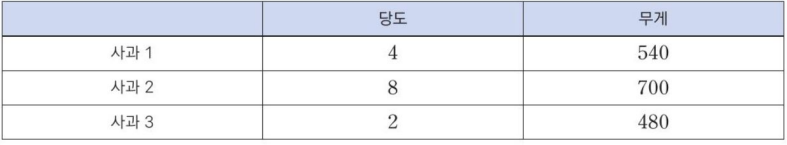  
데이터의 형태도 균일하고 누락된 값도 없음  
하지만 사과의 당도 범위는 1 - 10이고 사과의 무게 범위는 500 - 1000임  
이런 경우에 `두 특성의 스케일 차이가 크다` 라고 표현함  

`경사 하강법`은 스케일에 민감한 알고리즘이라 특성의 스케일을 맞추는 전처리를 해야함  

이때 특성의 스케일을 전처리 하는 것을 `스케일을 조정한다`라고 표현함

## 실습

### 1. 훈련 데이터 준비하고 스케일 비교하기
스케일 조정 안하고 모델을 훈련시켜본다면?

['mean perimeter' 'mean area']


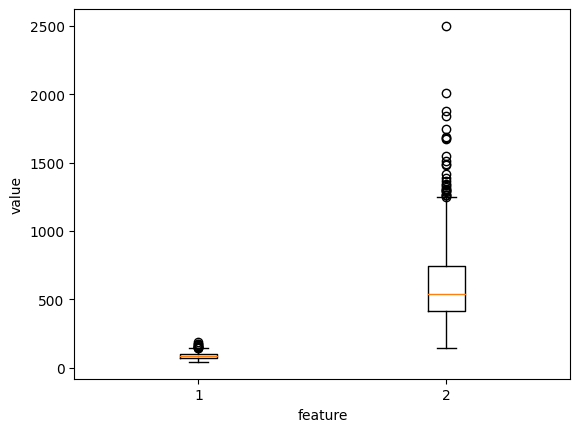

In [30]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

그래프로 보면 두 특성의 스케일 차이가 큼
1번 특성은 100 - 200 사이에 값이 있음  
2번 특성은 200 - 2000 사이에 값이 집중되어 있음

### 가중치를 기록할 변수와 학습률 파라미터 추가

In [31]:
class SingleLayer():
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []     # 에포크마다 가중치의 값 저장
    self.lr = learning_rate # 학습률 파라미터, 이 값으로 가중치 업데이트 양을 조절

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])          # 가중치 초기화
    self.b = 0                            # 절편 초기화
    self.w_history.append(self.w.copy())  # 가중치 기록
    np.random.seed(42)                    # 무작위로 시드 지정

    for i in range(epochs):              # epochs만큼 반복
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
      for i in indexes:             # 모든 샘플에 대해 반복
        z = self.forpass(x[i])      # 정방향 계산
        a = self.activation(z)      # 활성화 함수 적용
        err = -(y[i] - a)           # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= self.lr * w_grad    # 가중치 업데이트 (학습률 적용)
        self.b -= b_grad              # 절편 업데이트

        self.w_history.append(self.w.copy())  # 가중치 기록
        a = np.clip(a, 1e-10, 1-1e-10)        # 안전한 로그 게산을 위해 클리핑 후 손실 누적
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))

      self.losses.append(loss / len(y))   # 에포크 마다 평균 손실 저장

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err        # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err        # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

### 4. 모델 훈련하고 평가하기

In [32]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_val, y_val)

0.9120879120879121

### 100번의 에포크 동안 변경된 가중치 확인

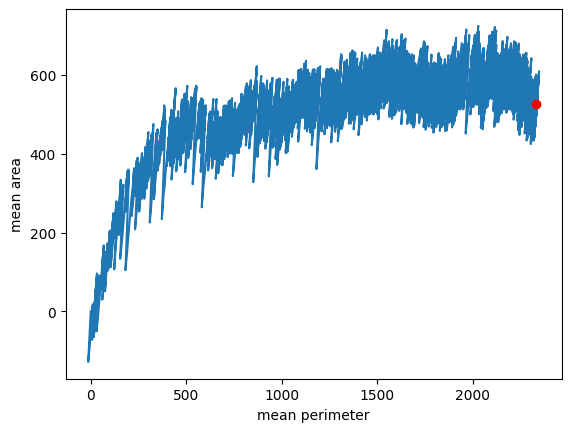

In [33]:
w2 = [] # mean perimeter
w3 = [] # mean area
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('mean perimeter')
plt.ylabel('mean area')
plt.show()

### 분석
mean perimeter에 비해 mean area의 스케일이 크므로 mean area의 값이 학습 과정에서 큰 폭으로 흔들리며 변화함  

mean perimeter은 0부터 시작해 최적값에 가까워짐   

mean area에 대한 그레이디언트가 크기 때문에 mean area 축을 따라 가중치가 크게 요동침  

### 정리
가중치의 최적값에 도달하는 동안 w3 값이 크게 요동치므로 모델이 불안정하게 수렴함

### 해결법
스케일을 조정하면 **됨**

## 스케일 조정하기
스케일을 조정하는 방법은 많음  
신경망에서 자주 사용하는 스케일 조정 방법 중 하나는 표준화(standardization)임  
특성값에서 평균을 빼고 표준편차로 나누면 됨  

표준 편차는 데이터가 얼마나 흩어져 있는지를 나타내는 지표로 분산(variance)의 제곱근임

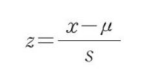

### 1. numpy로 표준화 구현

In [34]:
train_mean = np.mean(x_train, axis=0) # 평균 구하기
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [35]:
# numpy mean 함수 axis 이해하기
data = np.array([
    [[1,1,1,1],
     [1,1,1,1],
     [1,1,1,1]],

    [[2,2,2,2],
     [2,2,2,2],
     [2,2,2,2]]

])

# 데이터는 2그룹 3행 4열 행렬 (2 * 3 * 4 행렬)
print("axis = 0")
print(np.mean(data, axis=0)) # 각 그룹의 같은 원소끼리 평균
# return 3 * 4 array
print("")

print("axis = 1")
print(np.mean(data, axis=1)) # 각 그룹의 열 평균
# return 2 * 4 array
print("")

print("axis = 2")
print(np.mean(data, axis=2)) # 각 그룹의 행 평균
# return 2 * 3 array
print("")

print("axis = (1, 2)")
print(np.mean(data, axis=(1, 2))) # 각 그룹의 평균
# return 1 * 2

axis = 0
[[1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5]]

axis = 1
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]]

axis = 2
[[1. 1. 1.]
 [2. 2. 2.]]

axis = (1, 2)
[1. 2.]


In [36]:
# numpy std 함수
# np.std(arr, axis=None, dtype=None)
# arr : 표준 편차를 계산하기 위한 입력 배열

# axis : 표준 편차가 계산되는 축
# axis=0 : 열을 따라 계산된 표준 편차
# axis=1 : 행을 따라 계산된 표준편차

# dtype: 표준 편차를 계산하는 동안 사용되는 dtype 또는 None 데이터 유형

### 2. 모델 훈련하기



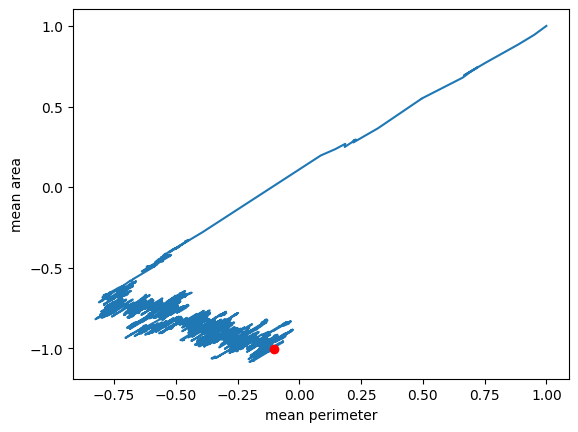

In [37]:
layer = SingleLayer()
layer.fit(x_train_scaled, y_train)

w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('mean perimeter')
plt.ylabel('mean area')
plt.show()

### 분석
mean perimeter과 mean area의 변화 비율이 비슷하기 때문에 대각성 방향으로 가중치가 이동됨  

두 특성의 스케일도 비슷하게 맞춰서 최적값에 빠르게 근접하고 있음

## 모델 성능 평가

In [38]:
layer.score(x_val, y_val)

0.37362637362637363

### 성능이 매우 좋지 않음 (37%)
이 모델은 훈련 세트와 검증 세트의 스케일이 비슷할 거라고 기대함  
하지만 검증 세트의 스케을은 안바꾸고 훈련 세트의 스케일만 바꿔서 성능이 좋지 않은 것

In [39]:
# 검증 세트 표준화 전처리
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer.score(x_val_scaled, y_val)

0.967032967032967

검증 세트에 대한 정확도가 매우 크게 오름 (37% ▶ 96%)

하지만 여기서 조심해야 할 점이 있음  

`훈련 세트와 검증 세트가 다른 비율로 스케일이 조정된 경우`를 조심해야함

### 1. 원본 훈련 세트와 검증 세트로 산점도 그려보기

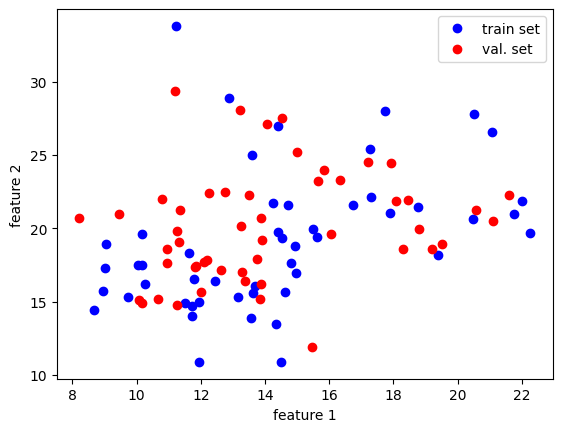

In [40]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

파란색이 훈련 세트  
빨간색이 검증 세트

### 2. 전처리한 훈련 세트와 검증 세트로 산점도 그리기

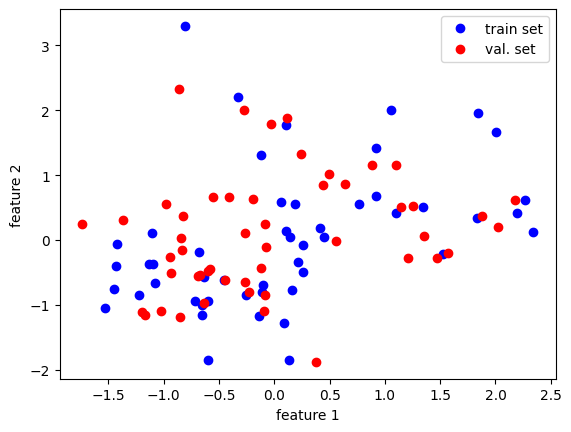

In [41]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

(0.0, 2) 지점과 (1.0, 1) - (1.0, 2) 부분이 미세하게 다른 비율로 변환된 걸 알 수 있음  
즉, 훈련 세트와 검증 세트의 점과 점 사이의 거리가 변환된 이후에 그대로 유지되지 않고 조금씩 변경됨  

제대로 스케일을 조정했다면 훈련 세트와 검증 세트의 거리가 그대로 유지되어야 함  

이런 현상이 일어나는 이유는 `각각의 세트를 다른 비율로 전처리 했기 때문임`

### 올바르게 검증 세트 전처리하기

평균과 표준편차를 다시 계산하는게 아니라, 훈련세트의 평균, 표준 편차가지고 검증 세트를 변환하면 됨

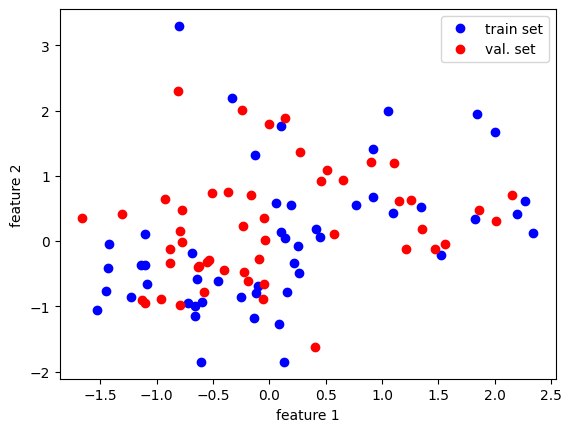

In [42]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

### 훈련 세트의 산점도
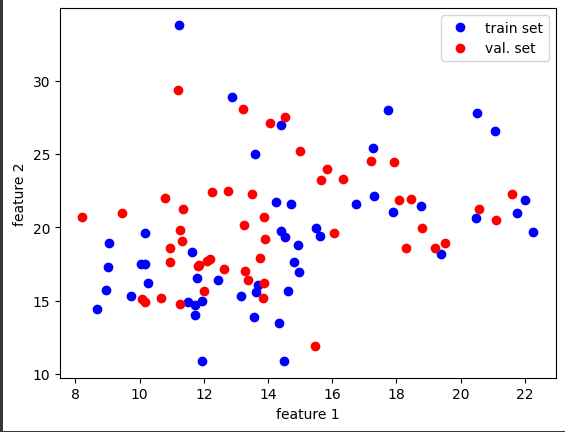

비교해보면 산점도가 같아졌음을 알 수 있음

### 모델 평가하기

In [43]:
layer.score(x_val_scaled, y_val)

0.967032967032967

# 과대적합과 과소적합

## 과대적합
과대적합이란 모델이 훈련 세트에서는 좋은 성능을 내지만, 검증 세트에서는 낮은 성능을 내는 경우임  
예를 들면, 훈련 세트의 정확도가 99%이고, 검증 세트의 정확도가 80% 수준이면 과대적합을 의심할 수 있음

## 과소 적합
과소 적합은 훈련 세트와 검증 세트의 성능에는 차이가 없지만, 둘 다 낮은 성능을 내는 경우임

### 과대 적합의 전형적인 모습


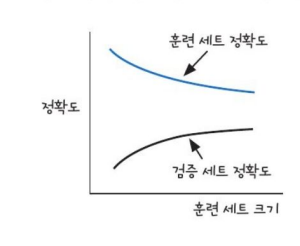

훈련 세트와 검증 세트의 성능의 간격이 큼  
`분산이 크다(high variance)`라고 표현함  

주요 원인 중 하나는 훈련 세트에 충분히 다양한 패턴의 샘플이 포함되지 않아서임  
훈련 세트에 다양한 패턴의 샘플이 없으니 검증 세트에 제대로 적응하지 못한 것  

이 경우는 더 많은 훈련 샘플을 모아 검증 세트의 성능을 향상시킬 수 있음  

만약 훈련세트를 더 모을 수 없다면?  
이 경우는 모델이 훈련 세트에 집착하지 않도록 가중치를 제한할 수 있음  
`모델의 복잡도를 낮춘다`라고 표현함

## 과소 적합의 전형적인 모습


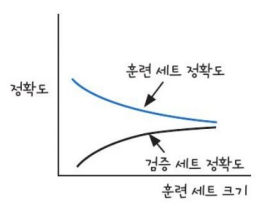

훈련 세트와 검증 세트에서 측정한 성능의 간격은 점점 가까워지지만, 성능 자체가 낮음  
`편향이 크다(high bias)`라고 표현함  

과소적합은 모델이 충분히 복잡하지 않아 훈련 데이트에 있는 모든 패턴을 잡아내지 못하는 현상임  
이 경우는 복잡도가 더 높은 모델을 사용하거나, 가중치의 규제를 완화하면 됨  

### 과대 적합과 과소적합 사이에서 절충점을 찾은 그래프
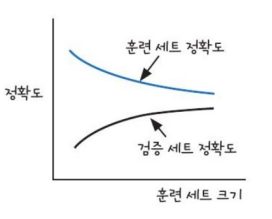

# 규제 방법
과대적합을 해결하는 대표적인 방법 중 하나로 `가중치 규제(regularization)`이라는 키워드가 나옴  
가중치 규제란 가중치의 값이 커지지 않도록 제한하는 기법  
가중치를 제한하면 모델의 일반화 성능이 올라감

## L1 규제
그레이디언트에서 alpha에 가중치의 부호를 곱하고 그레이디언트에 더함
```
w_grad += alpha * np.sign(w)
```

## L2 규제
그레이디언트에서 alpha에 가중치를 곱한 후 그레이디언트에 더함
```
w_grad += alpha * w
```

## 로지스틱 회귀에 규제 적용해보기

In [50]:
class SingleLayer():

  # 1. 그레이디언트 업데이트 수식에 페널티 항 반영
  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []     # 에포크마다 가중치의 값 저장
    self.lr = learning_rate # 학습률 파라미터, 이 값으로 가중치 업데이트 양을 조절
    self.l1 = l1
    self.l2 = l2

  # 2. 역방향 계산 수행할 때 그레이디언트에 페널티 항의 미분값을 더함
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)

        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= self.lr * w_grad
        self.b -= b_grad

        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append((loss/len(y)) + self.reg_loss())
      self.update_val_loss(x_val, y_val)

# 3. 로지스틱 손실 함수 계산테 페널티 항 추가
  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

# 4. 검증 세트 손실을 계산하는 메서드에서 reg_loss 호출
  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return

    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a) + (1 - y_val[i]) * np.log(1 - a))
    self.val_losses.append(val_loss / len(y_val) + self.reg_loss())

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err        # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err        # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

### cancer 데이터 세트에 L1 규제 적용

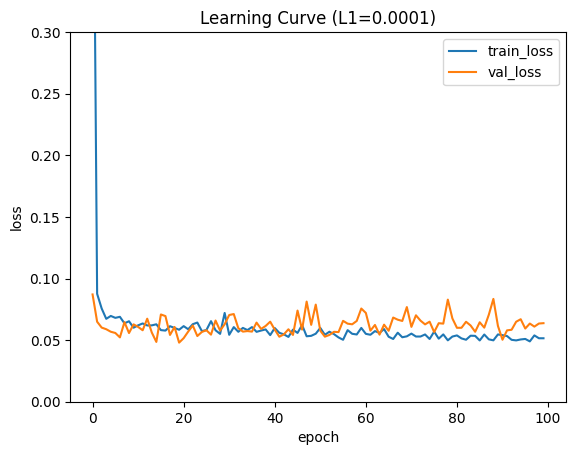

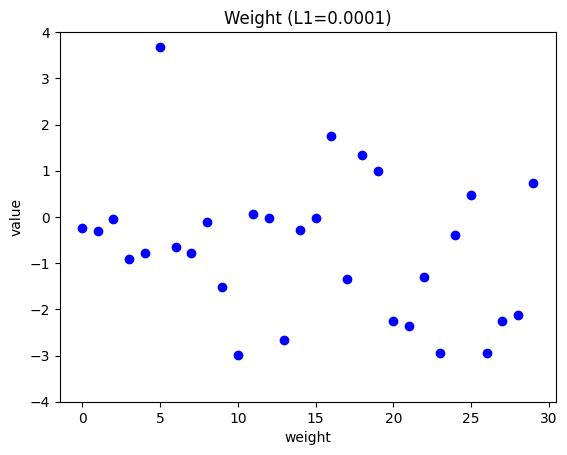

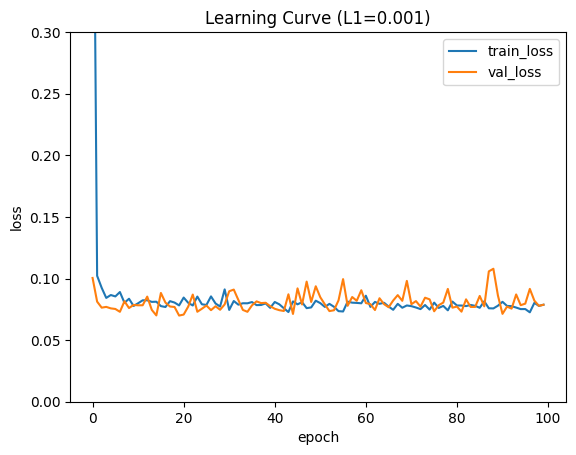

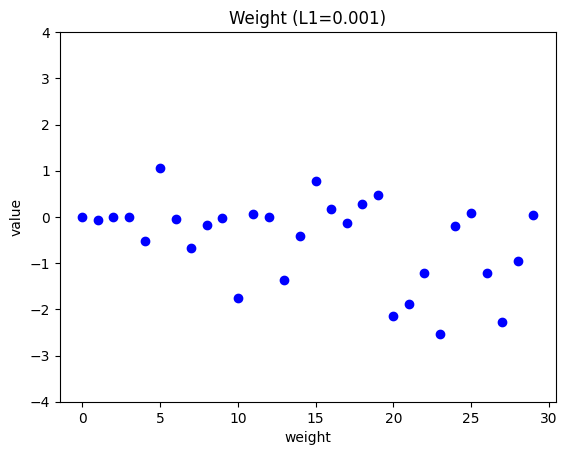

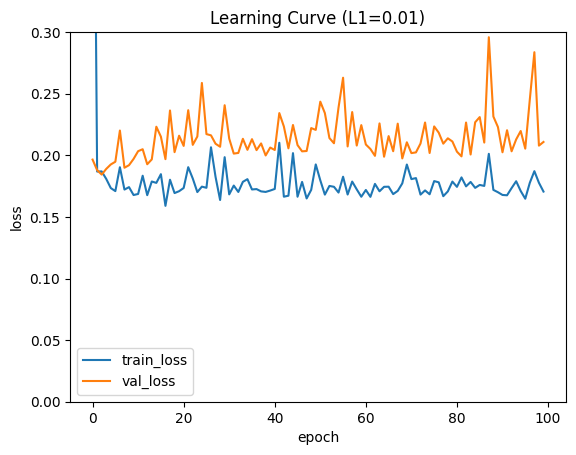

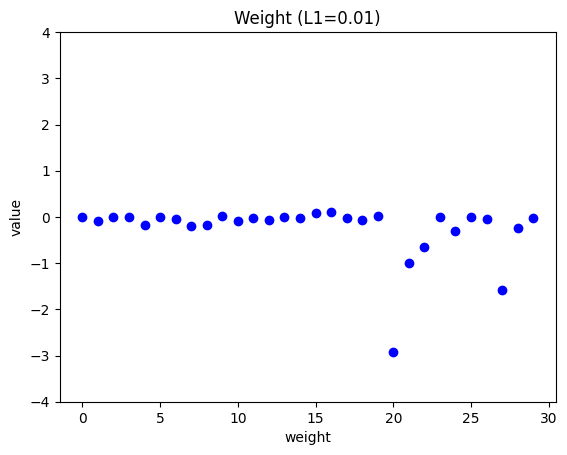

In [54]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1 = l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (L1={})'.format(l1))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (L1={})'.format(l1))
  plt.xlabel('weight')
  plt.ylabel('value')
  plt.ylim(-4, 4)
  plt.show()

### L1 규제 분석

### 학습 곡선 그래프
규제(L1)이 커질수록 훈련 세트의 손실과 검증 세트의 손실이 모두 높아짐
(과소적합 현상이 나타남)  

### 가중치 그래프
규제(L1)이 커질수록 가중치의 값이 0에 가까워 지는걸 볼 수 있음

## cancer 데이터 세트에 L2 규제 적용

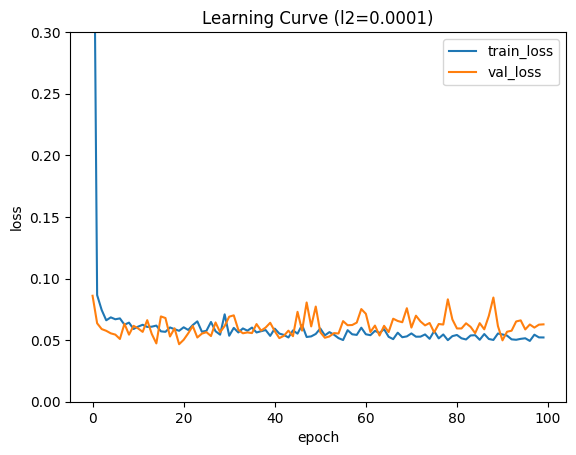

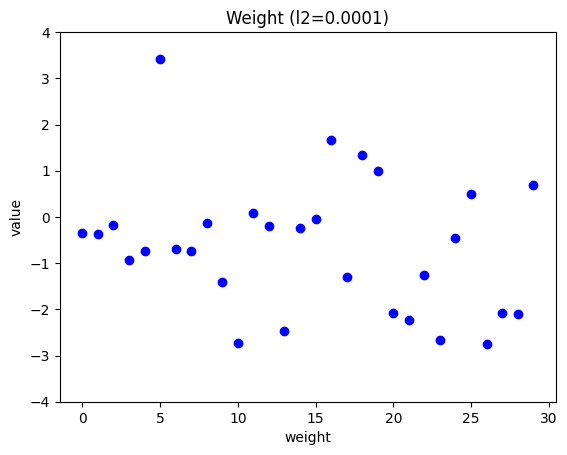

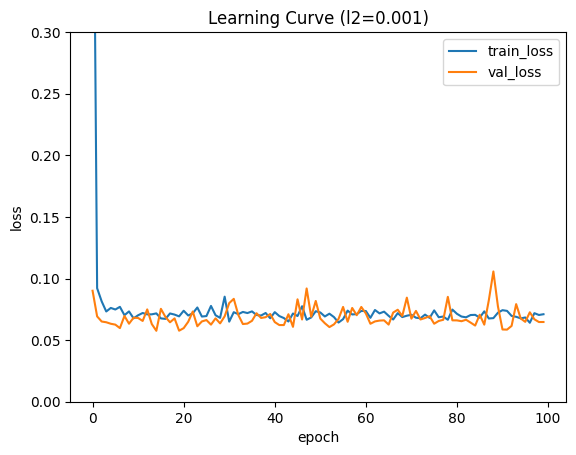

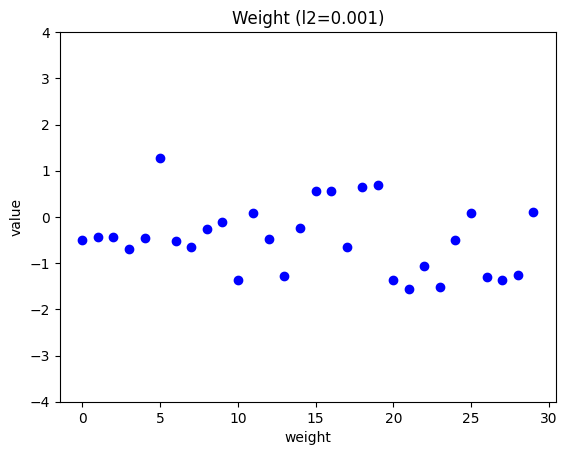

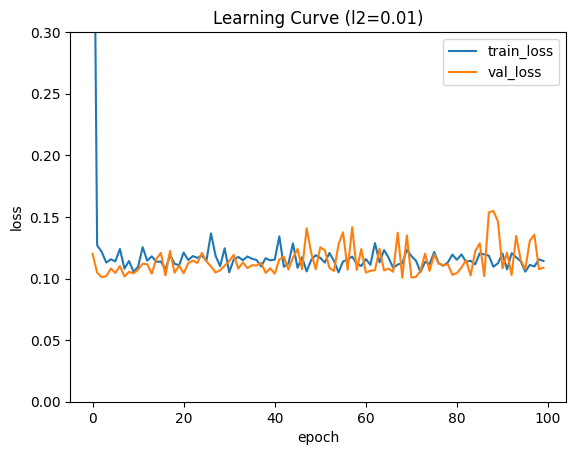

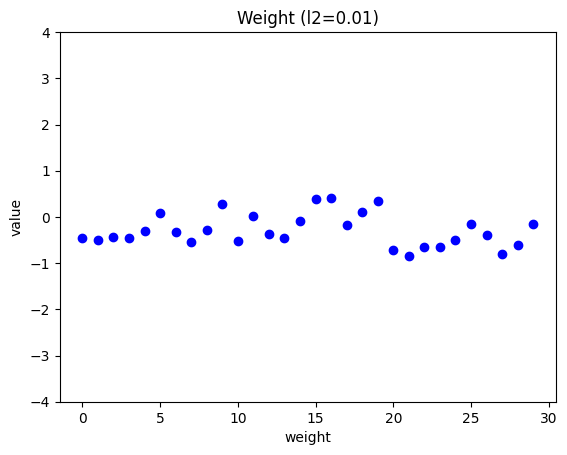

In [56]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.xlabel('weight')
  plt.ylabel('value')
  plt.ylim(-4, 4)
  plt.show()

### L2 규제 분석
L1규제와 비슷한 양상을 보이지만, 마지막 학습 곡선 그래프를 보면 L2는 규제 강도가 강해져도 L1만큼 과소적합이 심해지지 않음  

가중치 그래프를 봐도 가중치가 0에 너무 가깝게 줄지 않음

In [58]:
# L2규제 적용 모델 50번 에포크 훈련 후 성능 평가
layer = SingleLayer(l2=0.01)
layer.fit(x_train_scaled, y_train, epochs=50)
layer.score(x_val_scaled, y_val)

np.sum(layer.predict(x_val_scaled) == y_val)

89